In [10]:
import pandas as pd
import os

DATA_DIR = os.path.abspath("")

path_to_data_raw = os.path.join(DATA_DIR, r"data_raw\ufo_sightings_scrubbed.csv")

ufo_df = pd.read_csv(path_to_data_raw, dtype=str)

In [11]:
ufo_df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.9411111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.6458333
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.8036111
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.7844444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.2025
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.2844444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.2655556


In [12]:
# Spaltennamen neusetzen:
ufo_df.columns = ['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',            # einige spalten hatten leerzeichen und andere "unsichtbare" zeichen
       'duration_hour_min', 'comments', 'date_posted', 'latitude',
       'longitude']

In [13]:
# Spalte duration_seconds bereinigen und von string nach numeric wandeln:
ufo_df["duration_seconds"] = ufo_df["duration_seconds"].str.replace(r"\D", "", regex = True) # nicht Zahlen entfernen . z.b. '2´'
ufo_df["duration_seconds"] = pd.to_numeric(ufo_df["duration_seconds"])      # HIER GEHEN ZAHLEN VERLOREN AB ZEILE 65535, wenn die csv oben nicht als dtype str eingelesen wurde
ufo_df["duration_seconds"].dtype

dtype('int64')

In [14]:
# Spalte latitude und longitude bereinigen:
ufo_df["latitude"]  = ufo_df["latitude"].str.replace(r"[^\d.-]", "", regex = True)
ufo_df["latitude"]  = pd.to_numeric(ufo_df["latitude"])              # HIER GEHEN ZAHLEN VERLOREN AB ZEILE 65535, wenn die csv oben nicht als dtype str eingelesen wurde
ufo_df["longitude"] = pd.to_numeric(ufo_df["longitude"])
print(ufo_df["latitude"].dtype, ufo_df["longitude"].dtype)

float64 float64


In [17]:
# Die beiden Spalten mit Datums hatten keine Probleme

In [25]:
# Abspeichern als neue csv in data\data_clean
path_to_data_clean = os.path.join(DATA_DIR, r"data_clean\ufo_sightings_scrubbed_clean.csv")

ufo_df.to_csv(path_to_data_clean)

ufo_clean_df = pd.read_csv(path_to_data_clean)
ufo_clean_df.dtypes

Unnamed: 0             int64
datetime              object
city                  object
state                 object
country               object
shape                 object
duration_seconds       int64
duration_hour_min     object
comments              object
date_posted           object
latitude             float64
longitude            float64
dtype: object


 Top 100 längste UFO-Sichtungen:


,city,state,country,duration_seconds,hour
3402,lakeville (south of twin cities about 15 miles),mn,us,73800,3
3950,prescott valley,az,us,73800,18
7262,canvey island (uk/england),NaN,NaN,73800,2
27384,bessemer,al,us,73800,1
28415,phoenix,az,us,73800,3
...,...,...,...,...,...
40880,joseph city-winslow,az,NaN,37800,21
41254,haines city,fl,us,37800,22
43005,union city,tn,us,37800,22
43008,cocoa,fl,us,37800,21


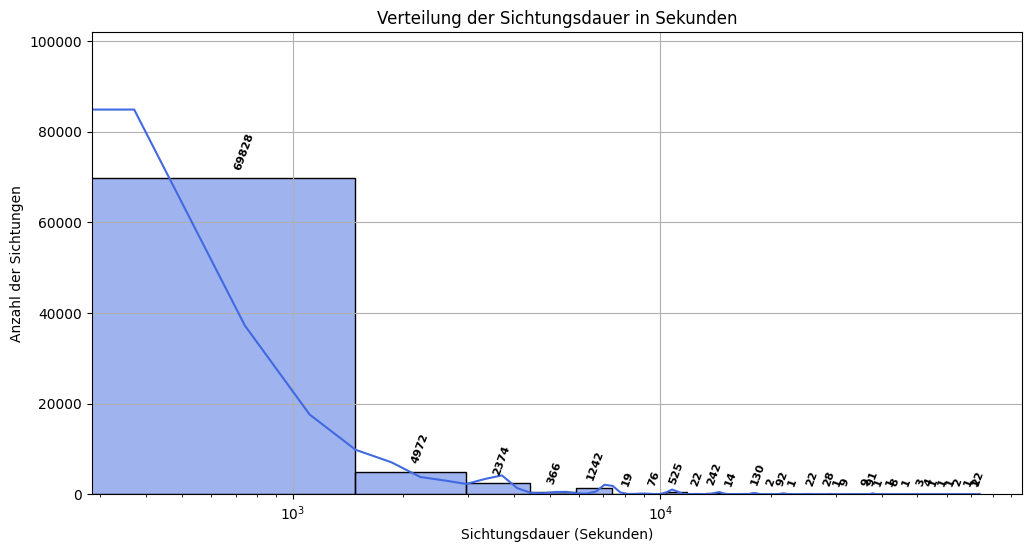

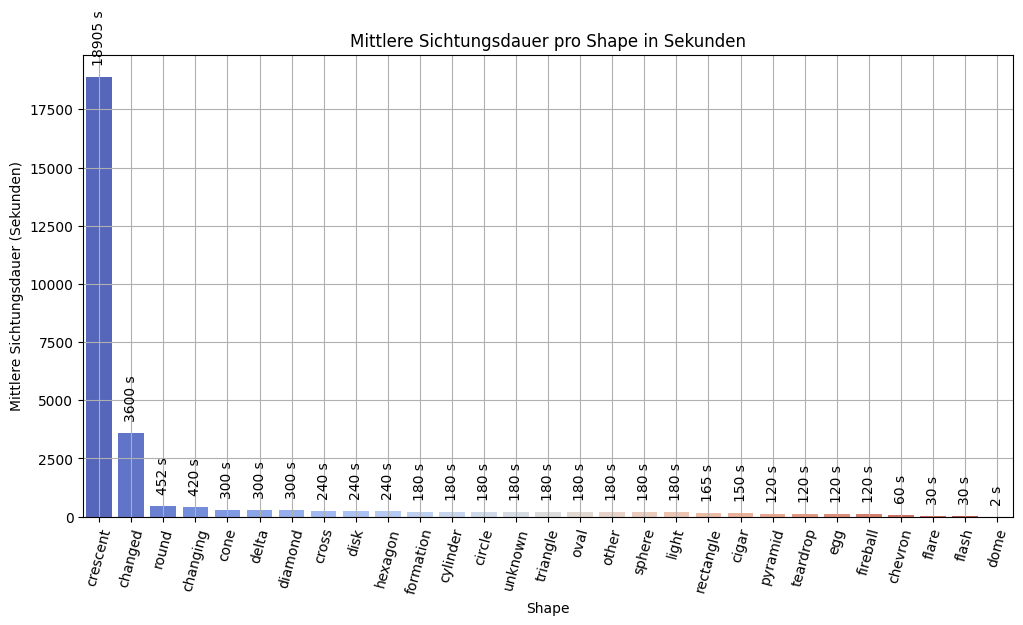

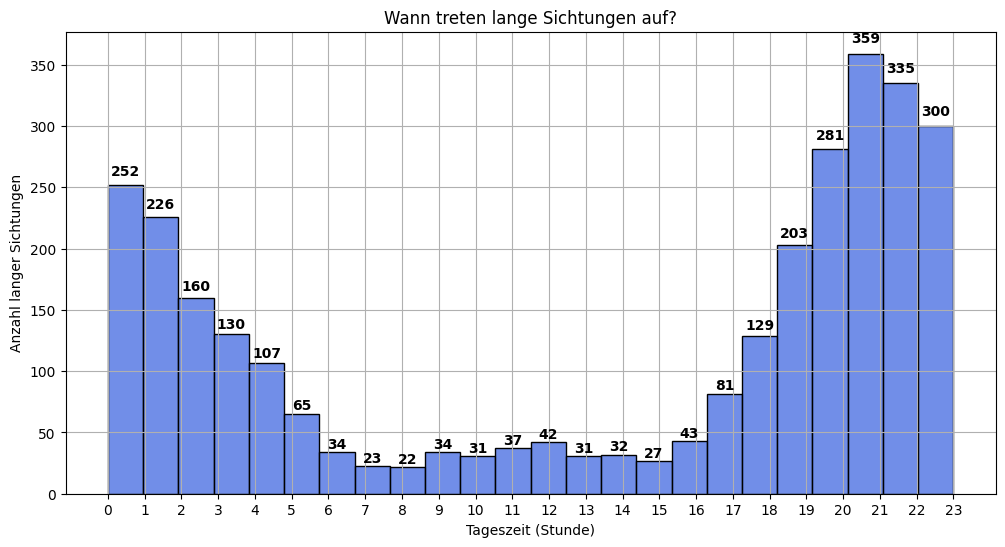

✅ Datei erfolgreich gespeichert unter: c:\Users\Admin\Desktop\Business Analytics\März_25\Projekt_12.03\Projekt_UFO_Theo\Projekt_UFO\data_Theo\data_clean/ufo_sightings_scrubbed_clean.csv


In [ ]:
# Erforderliche Bibliotheken erneut importieren
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei erneut hochladen (da sie im Speicher verloren ging)
file_path = "data_clean/ufo_sightings_scrubbed_clean.csv"  # Ursprünglicher Upload-Pfad

# Datei einlesen und Spaltennamen bereinigen
df = pd.read_csv(file_path, low_memory=False)
df.columns = df.columns.str.strip()  # Entfernt überflüssige Leerzeichen aus Spaltennamen


# Umbenennen der Spalte "duration (seconds)" in "duration_seconds" für eine einfachere Handhabung
df.rename(columns={"duration (seconds)": "duration_seconds"}, inplace=True)

# Sicherstellen, dass die Spalte "duration_seconds" als ganze Zahl gespeichert wird
df["duration_seconds"] = pd.to_numeric(df["duration_seconds"], errors="coerce").fillna(0).astype(int)


 
# **Längste Sichtungen: Orte & Tageszeiten**
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df["hour"] = df["datetime"].dt.hour  # Uhrzeit extrahieren

# Top 100 längste Sichtungen
top_sightings = df.nlargest(100, "duration_seconds")[["city", "state", "country", "duration_seconds", "hour"]]

# Anzeigen 
print("\n Top 100 längste UFO-Sichtungen:")
display(top_sightings)  


# Histogramm der Verteilung der Sichtungsdauer mit Werten auf den Balken
plt.figure(figsize=(12, 6))
ax = sns.histplot(df["duration_seconds"], bins=50, kde=True, color="royalblue")

# Werte auf die Balken schreiben (90° gedreht mit gleichem Abstand für alle Balken)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Nur anzeigen, wenn der Wert größer als 0 ist
        ax.text(p.get_x() + p.get_width() / 2, height + max(df["duration_seconds"]) * 0.02,  # Fester Abstand für alle Balken
                f'{int(height)}', ha='center', va='bottom', fontsize=8, color="black", fontweight="bold", rotation=70)

plt.xlabel("Sichtungsdauer (Sekunden)")
plt.ylabel("Anzahl der Sichtungen")
plt.title("Verteilung der Sichtungsdauer in Sekunden")
plt.xscale("log")  # Log-Skala für bessere Sichtbarkeit
plt.grid(True)
plt.show()

# Shapes mit der längsten Sichtungsdauer analysieren (Sekunden)
shape_durations = df.groupby("shape")["duration_seconds"].median().sort_values(ascending=False).reset_index()

# Balkendiagramm mit den mittleren Sichtungsdauern pro Shape
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=shape_durations, x="shape", y="duration_seconds", hue="shape", palette="coolwarm", legend=False)

# Werte auf die Balken schreiben (vertikal nach oben ausgerichtet)
for index, value in enumerate(shape_durations["duration_seconds"]):
    ax.text(index, value + 500, f"{int(value)} s", ha="center", va="bottom", rotation=90, fontsize=10, color="black")

plt.xticks(rotation=75)
plt.xlabel("Shape")
plt.ylabel("Mittlere Sichtungsdauer (Sekunden)")
plt.title("Mittlere Sichtungsdauer pro Shape in Sekunden")
plt.grid(True)
plt.show()

# Tageszeit-Analyse der längsten Sichtungen
plt.figure(figsize=(12, 6))
ax = sns.histplot(df[df["duration_seconds"] > df["duration_seconds"].quantile(0.95)]["hour"], bins=24, kde=False, color="royalblue")

# Werte auf die Balken schreiben
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Nur anzeigen, wenn der Wert größer als 0 ist
        ax.text(p.get_x() + p.get_width() / 2, height + height * 0.02, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10, color="black", fontweight="bold")

plt.xlabel("Tageszeit (Stunde)")
plt.ylabel("Anzahl langer Sichtungen")
plt.title("Wann treten lange Sichtungen auf?")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Bereinigte Datei speichern
df.to_csv(path_to_data_clean, index=False)
print(f"✅ Datei erfolgreich gespeichert unter: {path_to_data_clean}")
